# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

#### **A. Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories Kaggle `https://www.kaggle.com/datasets/mikhailbokov/bybit-btc-21-07-24-09daily-rsiema`.

# **2. Memuat Dataset**

In [44]:
#Memuat Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

# Load data
df = pd.read_csv (r'C:\Users\USER\Music\Machine Learning\dataset\dataset_btc.csv')
df.head(5)

,timestamp,open,high,low,close,volume,turnover,RSI,EMA
0,2021-08-22,48772.59,49506.70,48074.56,49223.35,132.608239,6.471912e+06,NaN,NaN
1,2021-08-21,49301.43,49731.15,48171.57,48772.59,132.869856,6.500926e+06,NaN,NaN
2,2021-08-20,46753.83,49338.00,46629.54,49301.43,260.425931,1.246281e+07,NaN,NaN
3,2021-08-19,44635.35,47001.35,43950.00,46753.83,230.822202,1.045596e+07,NaN,NaN
4,2021-08-18,44676.76,45930.00,44218.24,44635.35,227.924747,1.028671e+07,NaN,NaN


# **3. Exploratory Data Analysis (EDA)**

In [45]:
#Fungsi ini memberikan informasi penting tentang struktur
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1207 non-null   object 
 1   open       1207 non-null   float64
 2   high       1207 non-null   float64
 3   low        1207 non-null   float64
 4   close      1207 non-null   float64
 5   volume     1207 non-null   float64
 6   turnover   1207 non-null   float64
 7   RSI        1193 non-null   float64
 8   EMA        1188 non-null   float64
dtypes: float64(8), object(1)
memory usage: 85.0+ KB
None


In [46]:
print(df.describe())

               open          high           low         close        volume  \
count   1207.000000   1207.000000   1207.000000   1207.000000   1207.000000   
mean   38956.941839  39786.664358  38083.399180  38975.769577   8034.521909   
std    16102.699046  16456.359579  15701.672185  16115.008832   8258.689236   
min    15782.910000  16302.260000  15484.340000  15782.910000      3.802583   
25%    25954.985000  26302.850000  25625.720000  25954.985000   2020.109336   
50%    37200.090000  37864.940000  36256.910000  37222.660000   5290.007872   
75%    50510.335000  51621.620000  49133.210000  50624.155000  11306.733888   
max    73079.400000  73800.000000  71317.220000  73079.400000  83370.985286   

           turnover          RSI           EMA  
count  1.207000e+03  1193.000000   1188.000000  
mean   3.495671e+08    49.912052  38765.852934  
std    4.735471e+08    13.065255  15624.133431  
min    1.301613e+05    13.924030  16614.082727  
25%    6.016290e+07    40.454396  26285.432

In [47]:
#Mengecek Missing Values
df.isna().sum()

timestamp     0
open          0
high          0
low           0
close         0
volume        0
turnover      0
RSI          14
EMA          19
dtype: int64

In [48]:
#timestamp diubah sebagai index, DataFrame menjadi lebih mudah digunakan untuk analisis berbasis waktu
df.set_index('timestamp', inplace=False)

,open,high,low,close,volume,turnover,RSI,EMA
timestamp,,,,,,,,
2021-08-22,48772.59,49506.70,48074.56,49223.35,132.608239,6.471912e+06,NaN,NaN
2021-08-21,49301.43,49731.15,48171.57,48772.59,132.869856,6.500926e+06,NaN,NaN
2021-08-20,46753.83,49338.00,46629.54,49301.43,260.425931,1.246281e+07,NaN,NaN
2021-08-19,44635.35,47001.35,43950.00,46753.83,230.822202,1.045596e+07,NaN,NaN
2021-08-18,44676.76,45930.00,44218.24,44635.35,227.924747,1.028671e+07,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-08-30,59348.57,59944.16,57700.00,59130.23,19456.016647,1.148561e+09,50.658239,58441.138857
2024-08-29,59044.69,61175.07,58703.08,59348.57,18827.563337,1.124444e+09,51.355237,58527.560871
2024-08-28,59411.08,60257.77,57801.54,59044.69,23996.944745,1.421443e+09,50.290466,58576.811264


In [49]:
# Pastikan data sudah diurutkan berdasarkan timestamp
df = df.sort_values(by='timestamp')

# Mengubah tipe data ke datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.dtypes)

# 1. Hitung EMA
def calculate_ema(data, span):
    return data.ewm(span=span, adjust=False).mean()

df['EMA'] = calculate_ema(df['close'], span=20)

# 2. Hitung RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['close'])

# Tangani Missing Values
# Jika tidak ingin garis terputus, isi missing values dengan metode forward-fill atau backward-fill
df['EMA'] = df['EMA'].fillna(method='ffill')
df['RSI'] = df['RSI'].fillna(method='ffill')



timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
turnover            float64
RSI                 float64
EMA                 float64
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_29036\3049824163.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['EMA'] = df['EMA'].fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_29036\3049824163.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['RSI'] = df['RSI'].fillna(method='ffill')


# **4. Visualisai Data**

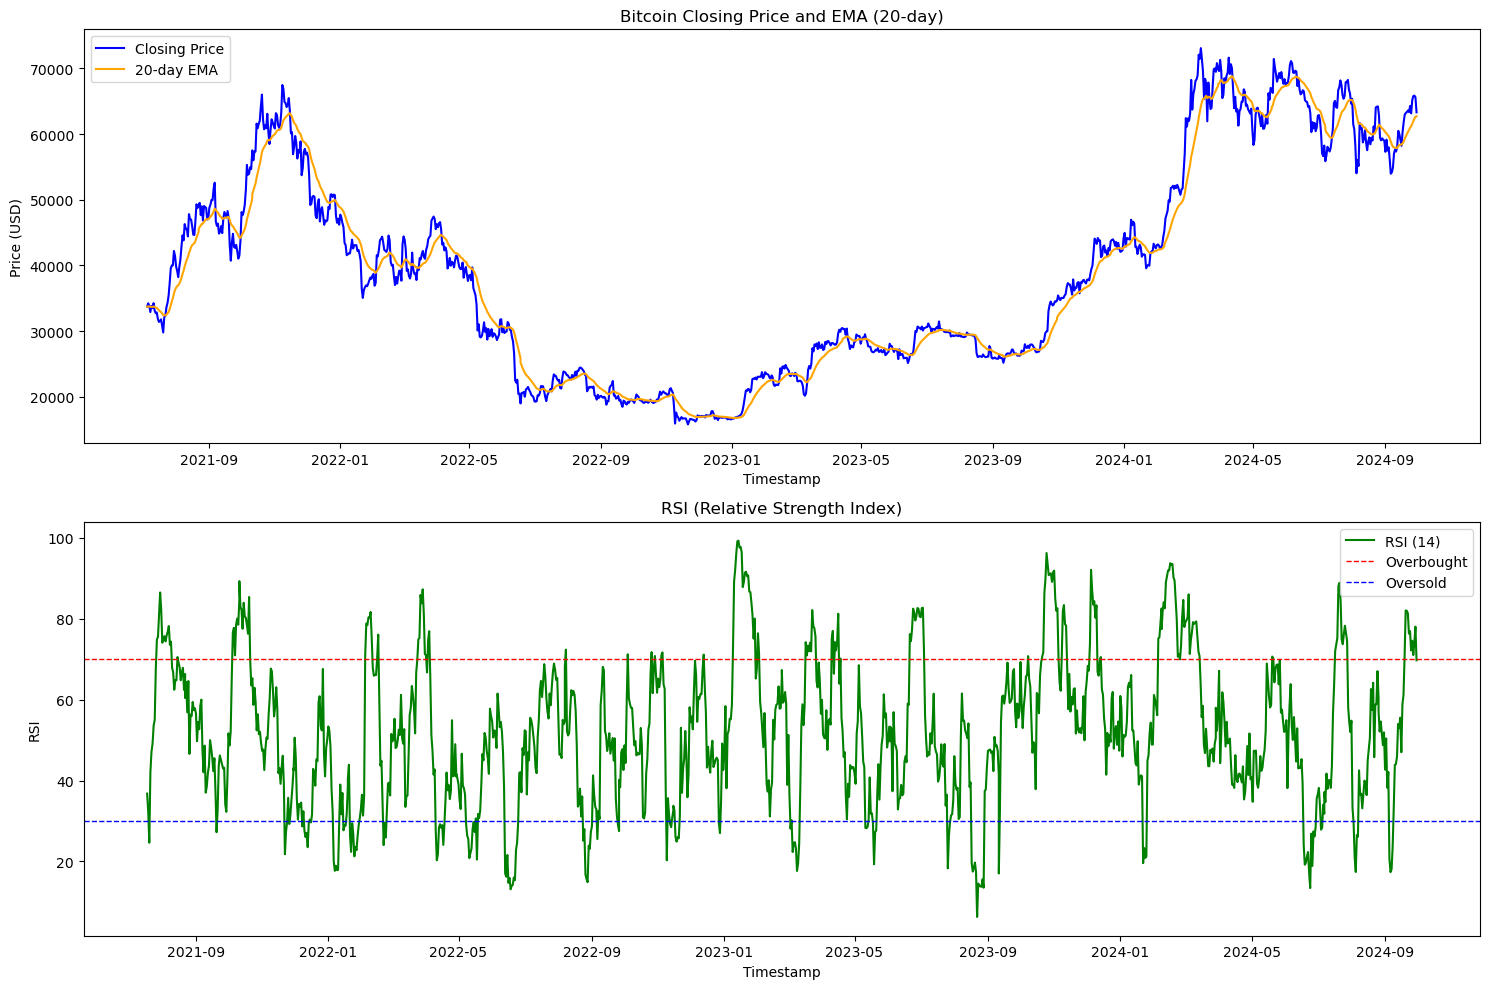

In [50]:
# Visualisasi data
plt.figure(figsize=(15, 10))

# Subplot 1: Closing Price dan EMA
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['close'], label='Closing Price', color='blue')
plt.plot(df['timestamp'], df['EMA'], label='20-day EMA', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Closing Price and EMA (20-day)')
plt.legend()

# Subplot 2: RSI
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['RSI'], label='RSI (14)', color='green')
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought')
plt.axhline(30, color='blue', linestyle='--', linewidth=1, label='Oversold')
plt.xlabel('Timestamp')
plt.ylabel('RSI')
plt.title('RSI (Relative Strength Index)')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

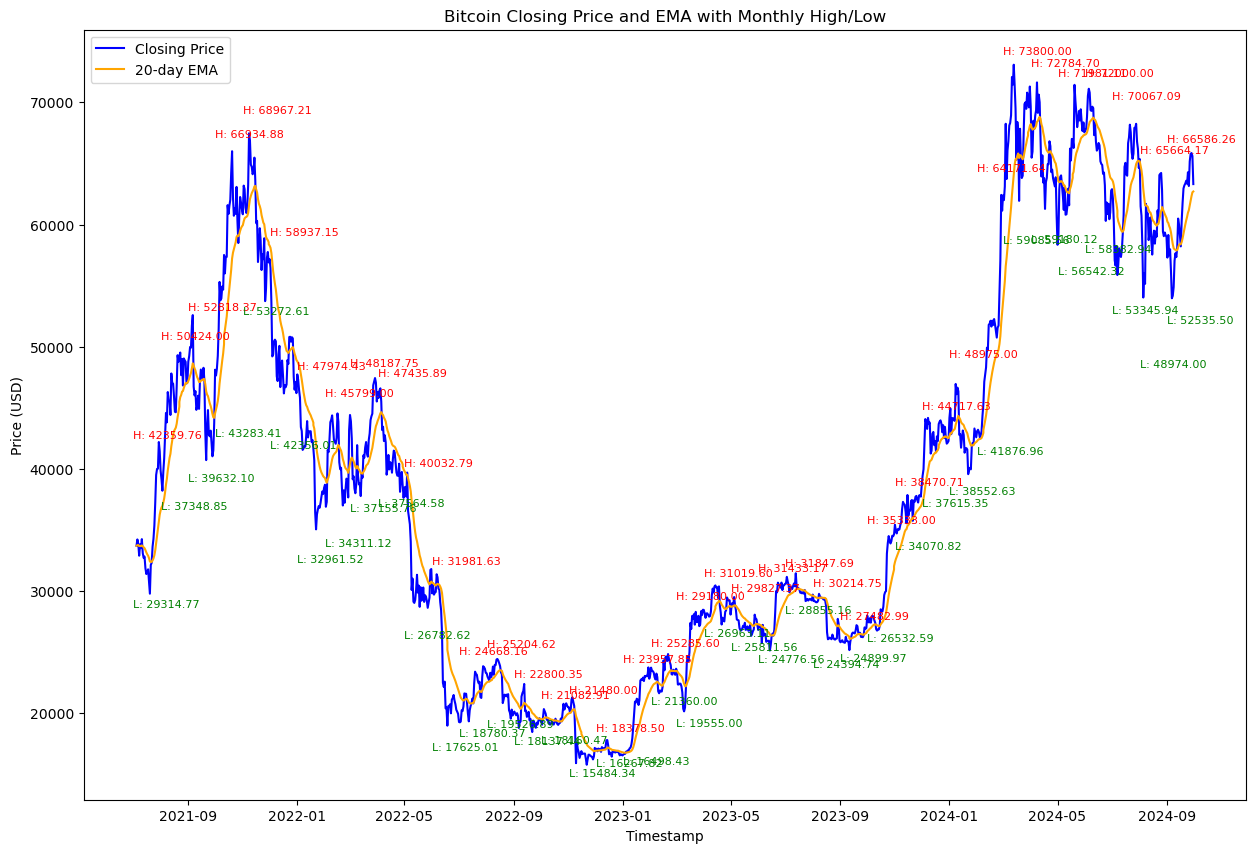

In [51]:
# Kelompokkan data per bulan
df['month'] = df['timestamp'].dt.to_period('M')  # Tambahkan kolom bulan
monthly_high_low = df.groupby('month').agg({'high': 'max', 'low': 'min'}).reset_index()

# 1. Plot Closing Price dan EMA
plt.figure(figsize=(15, 10))
plt.plot(df['timestamp'], df['close'], label='Closing Price', color='blue')
plt.plot(df['timestamp'], df['EMA'], label='20-day EMA', color='orange')

# 2. Tambahkan Anotasi Harga High dan Low
for _, row in monthly_high_low.iterrows():
    # Cari posisi timestamp awal bulan untuk plot
    month_start = pd.Timestamp(row['month'].start_time)
    high = row['high']
    low = row['low']
    
    # Tambahkan anotasi untuk high
    plt.text(
        month_start, high, f"H: {high:.2f}",
        color='red', fontsize=8, verticalalignment='bottom'
    )
    # Tambahkan anotasi untuk low
    plt.text(
        month_start, low, f"L: {low:.2f}",
        color='green', fontsize=8, verticalalignment='top'
    )

# 3. Tambahkan label dan judul
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Closing Price and EMA with Monthly High/Low')
plt.legend()

# Tampilkan grafik
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

In [52]:
from sklearn.model_selection import train_test_split

# Membaca data (asumsikan df sudah ada)
# df = pd.read_csv('data.csv', parse_dates=['timestamp'])

# Fitur (X) - Gunakan harga sebelumnya (lag features) dan indikator teknikal
df['prev_close'] = df['close'].shift(1)
df['prev_volume'] = df['volume'].shift(1)

# Target (y) adalah harga close di hari berikutnya
df['next_close'] = df['close'].shift(-1)

# Hapus baris yang memiliki NaN, baik di X maupun y (baik target atau fitur)
df_clean = df.dropna(subset=['prev_close', 'prev_volume', 'EMA', 'RSI', 'next_close'])

# Pisahkan fitur (X) dan target (y)
X = df_clean[['prev_close', 'prev_volume', 'EMA', 'RSI']]
y = df_clean['next_close']

# Pastikan panjang X dan y teralignment
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Cek data training dan testing
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X shape: (1193, 4), y shape: (1193,)
X_train shape: (954, 4), X_test shape: (239, 4)
y_train shape: (954,), y_test shape: (239,)


# **6. Pembangunan Model Clustering**

#### **A. Membagi Data untuk Latih dan Uji**
Pemisahan data menjadi dua set: Training Set dan Test Set untuk menghindari overfitting dan mengukur performa model.

In [53]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### **B. Memilih Model Machine Learning**
Model yang digunakan `Random Forest Regressor` untuk memprediksi harga BTC. Random Forest merupakan model yang lebih kompleks dan robust, baik untuk regresi atau klasifikasi (misalnya prediksi naik/turun).


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi harga BTC
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 3547.8965326359807


#### **C. Evaluasi Model Clustering**

Kita akan menggunakan K-Means Clustering, dan mengevaluasi kualitas clustering dengan menggunakan Silhouette Score.

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Menggunakan data yang sudah dibersihkan sebelumnya (df_clean)
# Fitur yang digunakan untuk clustering
X_clustering = df_clean[['prev_close', 'prev_volume', 'EMA', 'RSI']]

# Standarisasi fitur sebelum clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Coba clustering dengan berbagai jumlah klaster (k) dan evaluasi Silhouette Score
best_score = -1
best_k = 0
best_model = None

# Coba k = 2 hingga 10 (jumlah klaster yang berbeda)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Hitung Silhouette Score
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette Score untuk k={k}: {score}")
    
    # Simpan model dengan Silhouette Score terbaik
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

# Tampilkan hasil
print(f"\nBest K: {best_k} dengan Silhouette Score: {best_score}")

# Pastikan Silhouette Score minimal 0.55
if best_score >= 0.55:
    print("\nClustering berhasil dengan Silhouette Score minimal 0.55!")
else:
    print("\nSilhouette Score masih di bawah 0.55, coba perbaiki model atau data.")


Silhouette Score untuk k=2: 0.42401604946339405
Silhouette Score untuk k=3: 0.38373132992548276
Silhouette Score untuk k=4: 0.29744967559991076
Silhouette Score untuk k=5: 0.34122745335909427


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Silhouette Score untuk k=6: 0.3166996579724616
Silhouette Score untuk k=7: 0.3155931820094213
Silhouette Score untuk k=8: 0.3124124252758032
Silhouette Score untuk k=9: 0.32908891299115967
Silhouette Score untuk k=10: 0.3198731850159449

Best K: 2 dengan Silhouette Score: 0.42401604946339405

Silhouette Score masih di bawah 0.55, coba perbaiki model atau data.


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Hasil Silhouette Score masih di bawah 0.55, langkah selanjutnya untuk meningkatkan hasil klastering yaitru perbaikan fitur, dan ambahkan atau modifikasi fitur berdasarkan analisis data.

#### **D. Perbaikan Fitur**

In [56]:
# Menambahkan fitur volatilitas harga
df_clean['volatility'] = df_clean['high'] - df_clean['low']

# Normalisasi data jika diperlukan (misalnya volume dan turnover memiliki skala besar)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean[['volatility', 'prev_close', 'prev_volume', 'EMA', 'RSI']] = scaler.fit_transform(
    df_clean[['volatility', 'prev_close', 'prev_volume', 'EMA', 'RSI']]
)


C:\Users\USER\AppData\Local\Temp\ipykernel_29036\3003582369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['volatility'] = df_clean['high'] - df_clean['low']
C:\Users\USER\AppData\Local\Temp\ipykernel_29036\3003582369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['volatility', 'prev_close', 'prev_volume', 'EMA', 'RSI']] = scaler.fit_transform(


In [57]:
# Tambahkan fitur Momentum [Momentum: (close - EMA) / EMA]
df_clean['momentum'] = (df_clean['close'] - df_clean['EMA']) / df_clean['EMA']

# Tambahkan fitur relative change [Relative Change: (close - prev_close) / prev_close]
df_clean['relative_change'] = (df_clean['close'] - df_clean['prev_close']) / df_clean['prev_close']

# Periksa jika ada nilai NaN, infinity, atau nilai yang terlalu besar
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti infinity dengan NaN
df_clean = df_clean.dropna(subset=['momentum', 'relative_change', 'EMA', 'RSI'])  # Buang baris dengan NaN

# Pastikan hanya menggunakan kolom yang relevan untuk clustering
X_clustering = df_clean[['momentum', 'relative_change', 'EMA', 'RSI']]

# Normalisasi data untuk clustering
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Cek hasil normalisasi
print("Data setelah normalisasi:")
print(pd.DataFrame(X_scaled, columns=['momentum', 'relative_change', 'EMA', 'RSI']).head())

Data setelah normalisasi:
   momentum  relative_change       EMA       RSI
0  0.000411         0.006044  0.309772  0.327652
1  0.000392         0.005360  0.305982  0.281643
2  0.000376         0.005754  0.300655  0.197170
3  0.000455         0.008061  0.300145  0.383434
4  0.000461         0.005718  0.300000  0.438406


C:\Users\USER\AppData\Local\Temp\ipykernel_29036\2187392095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['momentum'] = (df_clean['close'] - df_clean['EMA']) / df_clean['EMA']
C:\Users\USER\AppData\Local\Temp\ipykernel_29036\2187392095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['relative_change'] = (df_clean['close'] - df_clean['prev_close']) / df_clean['prev_close']
C:\Users\USER\AppData\Local\Temp\ipykernel_29036\2187392095.py:8: SettingWithCopyWarning: 
A value is trying 

#### **E. Ganti Model Clustering**
 Model Clustering lain yang kita gunakan yaitu DBSCAN (untuk data dengan densitas tinggi)

In [58]:
#DBSCAN (untuk data dengan densitas tinggi).
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Anda bisa menyesuaikan parameter ini
labels = dbscan.fit_predict(X_scaled)

# Evaluasi dengan Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score dengan DBSCAN: {score}")

Silhouette Score dengan DBSCAN: 0.5906680737576514


C:\Users\USER\AppData\Local\Temp\ipykernel_29036\2150601323.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Gunakan colormap
C:\Users\USER\AppData\Local\Temp\ipykernel_29036\2150601323.py:26: RuntimeWarning: invalid value encountered in scalar divide
  color = colors(label / max(unique_labels))  # Normalisasi warna


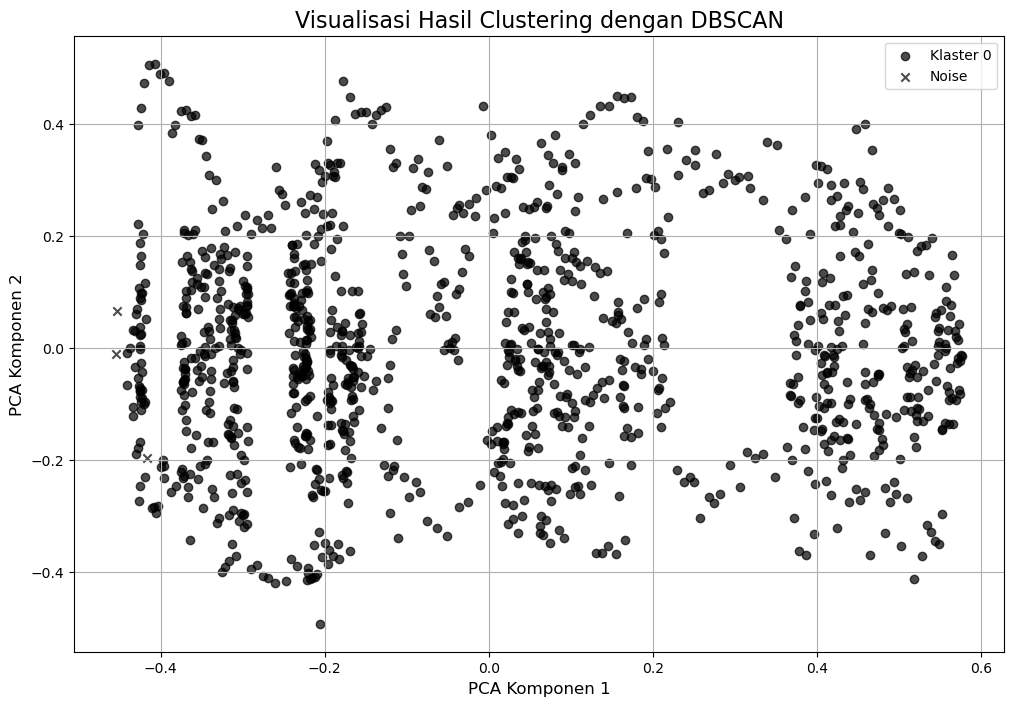

In [59]:
from sklearn.decomposition import PCA

# Jalankan DBSCAN lagi untuk mendapatkan label (jika belum dilakukan sebelumnya)
from sklearn.cluster import DBSCAN

# Gunakan parameter DBSCAN sesuai konfigurasi sebelumnya
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Reduksi dimensi menggunakan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi hasil clustering DBSCAN
plt.figure(figsize=(12, 8))
unique_labels = set(dbscan_labels)  # Label unik dari DBSCAN
colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Gunakan colormap

for label in unique_labels:
    if label == -1:
        # Noise
        color = 'k'  # Hitam untuk noise
        marker = 'x'
    else:
        # Klaster
        color = colors(label / max(unique_labels))  # Normalisasi warna
        marker = 'o'

    plt.scatter(
        X_pca[dbscan_labels == label, 0],  # Komponen PCA 1
        X_pca[dbscan_labels == label, 1],  # Komponen PCA 2
        c=[color],
        label=f'Klaster {label}' if label != -1 else 'Noise',
        marker=marker,
        alpha=0.7,
    )

plt.title("Visualisasi Hasil Clustering dengan DBSCAN", fontsize=16)
plt.xlabel("PCA Komponen 1", fontsize=12)
plt.ylabel("PCA Komponen 2", fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()


Distribusi Data dalam Setiap Klaster:
cluster
 0    1188
-1       3
Name: count, dtype: int64

Statistik Deskriptif Per Klaster:
        momentum                                                           \
           count          mean           std            min           25%   
cluster                                                                     
-1           3.0  6.539486e+07  5.645365e+07  327982.680234  4.741490e+07   
 0        1188.0  4.697652e+05  2.739096e+06   60935.113918  7.799395e+04   

                                                  relative_change  \
                  50%           75%           max           count   
cluster                                                             
-1       9.450183e+07  9.792830e+07  1.013548e+08             3.0   
 0       9.830835e+04  1.455133e+05  5.321126e+07          1188.0   

                       ...       EMA               RSI                      \
                 mean  ...       75%       max   count      m

C:\Users\USER\AppData\Local\Temp\ipykernel_29036\589121349.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='momentum', data=df_clean, palette='Set3')
C:\Users\USER\AppData\Local\Temp\ipykernel_29036\589121349.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='RSI', data=df_clean, palette='Set2')


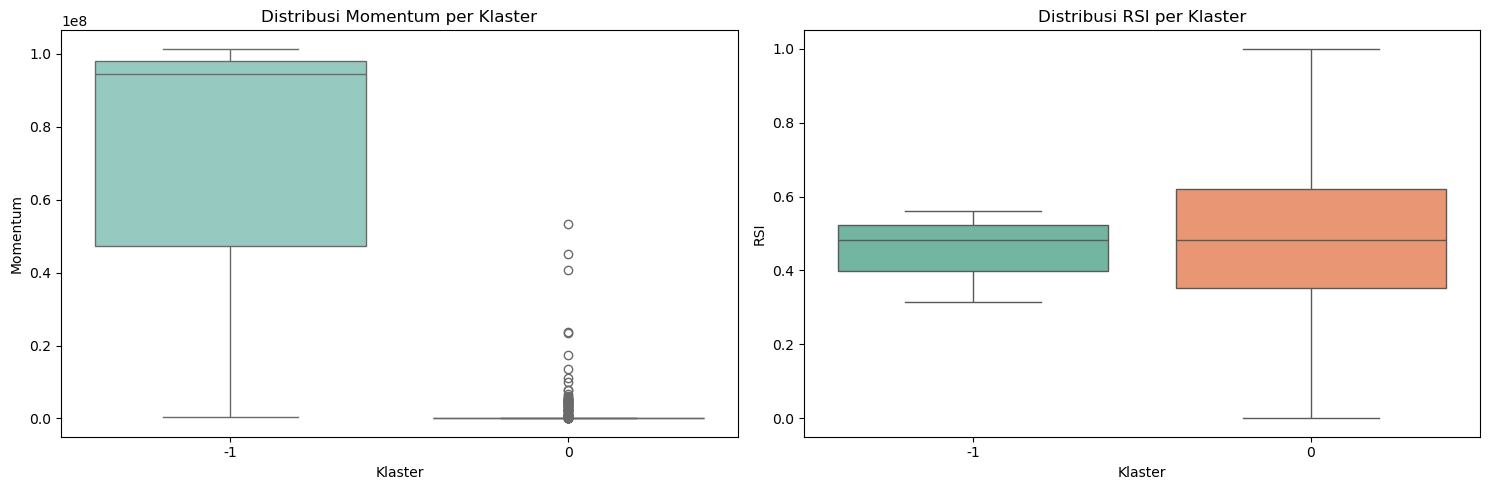

In [60]:
# Tambahkan label klaster ke dalam dataframe
df_clean['cluster'] = dbscan_labels

# Lihat distribusi data dalam setiap klaster
cluster_counts = df_clean['cluster'].value_counts()
print("Distribusi Data dalam Setiap Klaster:")
print(cluster_counts)

# Hitung statistik deskriptif per klaster
cluster_stats = df_clean.groupby('cluster')[['momentum', 'relative_change', 'EMA', 'RSI']].describe()
print("\nStatistik Deskriptif Per Klaster:")
print(cluster_stats)

# Plot distribusi momentum dan RSI untuk setiap klaster
plt.figure(figsize=(15, 5))

# Momentum
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='momentum', data=df_clean, palette='Set3')
plt.title("Distribusi Momentum per Klaster")
plt.xlabel("Klaster")
plt.ylabel("Momentum")

# RSI
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='RSI', data=df_clean, palette='Set2')
plt.title("Distribusi RSI per Klaster")
plt.xlabel("Klaster")
plt.ylabel("RSI")

plt.tight_layout()
plt.show()


## **7. Analisis Model Claster**
#### **A. Klaster 0 (Mayoritas Data)**

1. Jumlah Data:
    Sebagian besar data masuk ke klaster ini (1.188 dari 1.191 total).
    Representasi kondisi pasar Bitcoin yang stabil atau sering terjadi.

2. Momentum:
    Rata-rata: 469,765 (kecil dibandingkan klaster -1).
    Penyebaran: Rentang kecil dengan standar deviasi relatif rendah (2,739,096).
    Analisis: Momentum rendah mencerminkan kondisi pasar yang tidak terlalu volatil. Ini mengindikasikan bahwa sebagian besar waktu pasar relatif tenang.

3. Relative Change:
    Rata-rata: 0.00017 (kecil dan mendekati nol).
    Analisis: Perubahan harga harian relatif kecil, menunjukkan stabilitas pasar.

4. EMA:
    Nilai rata-rata EMA menunjukkan tren harga yang sudah stabil.
    Rata-rata RSI: 0.49 (hampir netral, tidak overbought atau oversold).
    Analisis: Klaster ini cenderung berada dalam kondisi pasar yang konsolidasi tanpa tren yang kuat.

#### **B. Klaster -1 (Noise)**

Jumlah Data:
Hanya 3 data yang masuk ke klaster ini, menunjukkan anomali dalam data.

1. Momentum:
    Rata-rata: 65,394,860 (sangat besar dibandingkan klaster 0).
    Penyebaran: Standar deviasi tinggi, menunjukkan volatilitas ekstrem.
    Analisis: Periode ini mungkin mencerminkan lonjakan harga yang sangat signifikan atau pergerakan pasar yang tidak biasa.

2. Relative Change:
    Rata-rata: 0.337 (besar dibandingkan klaster 0).
    Analisis: Perubahan harga relatif signifikan, mungkin mencerminkan lonjakan harga atau kondisi overbought/oversold ekstrem.

3. EMA dan RSI:
    Rata-rata RSI: 0.453 (mendekati netral, tetapi lebih rendah dibandingkan klaster 0).
    Analisis: Meskipun momentumnya tinggi, RSI tetap dalam kisaran yang tidak terlalu ekstrim, mungkin mencerminkan sinyal mixed di pasar.

#### **C. Pola Model Cluster**
Pola yang Ditemukan:

1. Klaster 0 (Kondisi Stabil):

Sebagian besar data berada di sini, mencerminkan kondisi pasar yang tidak terlalu volatil.
Bisa digunakan untuk identifikasi area konsolidasi atau tren pasar yang lemah.

2. Klaster -1 (Anomali/Volatilitas Tinggi):

Mengindikasikan pergerakan harga ekstrem yang mungkin penting untuk prediksi breakout.
Kondisi ini bisa digunakan sebagai sinyal kewaspadaan untuk trader atau investor.
Tujuan yang Dapat Dicapai:

3. Prediksi Harga:

Klasterisasi ini dapat membantu mengidentifikasi periode volatilitas rendah (Klaster 0) atau tinggi (Klaster -1), yang berguna untuk memprediksi potensi breakout atau tren baru.

4. Keputusan Jual/Beli:

Gunakan klaster untuk memberikan sinyal:
Klaster 0: Stabil, cocok untuk akumulasi (DCA).
Klaster -1: Volatilitas tinggi, mungkin sinyal untuk mengambil keuntungan atau menghindari risiko.

5. Analisis Risiko:

Klaster -1 dapat digunakan untuk mendeteksi periode berisiko tinggi dan memberikan panduan bagi investor yang menghindari volatilitas.
Optimalisasi Strategi DCA (Dollar-Cost Averaging):

Ketika data masuk ke Klaster 0, strategi DCA bisa lebih efektif karena volatilitas rendah.

#### **D. Langkah Selanjutnya**

1. Model Supervised Learning:

Gunakan hasil klasterisasi sebagai label untuk melatih model prediksi, misalnya untuk memprediksi klaster di masa depan berdasarkan indikator teknikal.

2. Evaluasi Ekstra:

Analisis lebih lanjut noise dalam klaster -1, apakah representasi ini relevan secara bisnis atau perlu pembersihan lebih lanjut.

3. Implementasi Strategi Trading:

Buat aturan berbasis klaster, seperti membeli dalam Klaster 0 dan menjual jika mendeteksi pola dari Klaster -1.

## **8. Export data**

In [61]:
# Eksport data ke file CSV
df_clean.to_csv('output_data.csv')

# Konfirmasi
print("Data berhasil dieksport ke file output_data.csv")


Data berhasil dieksport ke file output_data.csv
